In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
import os
import random
import numpy as np
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.models import Model
from tensorflow.keras import optimizers,applications,callbacks

In [ ]:
#Training and Validation Generator
batch_size = 32;
batch_size_val = 2;
datagen = ImageDataGenerator(rescale = 1./255)

train_generator = datagen.flow_from_directory(
        '/content/gdrive/MyDrive/Colab Notebooks/Organized Dataset/Train',
        target_size=(224, 224),
        color_mode="rgb",
        batch_size=batch_size,
        class_mode='categorical',
        seed = 103)

validation_generator = datagen.flow_from_directory(
        '/content/gdrive/MyDrive/Colab Notebooks/Organized Dataset/Validation',
        target_size=(224, 224),
        color_mode="rgb",
        batch_size=batch_size_val,
        class_mode='categorical',
        seed = 103)

Found 9424 images belonging to 2 classes.
Found 2020 images belonging to 2 classes.


In [ ]:
num_classes = 2;

Model: DenseNet-201

In [ ]:
model = applications.vgg16.VGG16(weights='imagenet', include_top=True)

553476096/553467096 [==============================] - 2s 0us/step


In [ ]:
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.models import Model
# make a reference to VGG's input layer
inp = model.input

# make a new softmax layer with num_classes neurons
new_classification_layer = Dense(num_classes, activation='softmax')

# connect our new layer to the second to last layer in VGG, and make a reference to it
out = new_classification_layer(model.layers[-2].output)

# create a new network between inp and out
model_new = Model(inp, out)

In [ ]:
# make all layers untrainable by freezing weights (except for last layer)
for l, layer in enumerate(model_new.layers[:-1]):
    layer.trainable = False

# ensure the last layer is trainable/not frozen
for l, layer in enumerate(model_new.layers[-1:]):
    layer.trainable = True

opt = optimizers.SGD(learning_rate=20)
model_new.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [ ]:
callback = callbacks.EarlyStopping(monitor='loss', patience=4)
callbacks=[callback]

In [ ]:
import time
start = time.time()
history2 = model_new.fit(train_generator, 
                         steps_per_epoch = 295,
                         epochs=25,
                         validation_data=validation_generator,
                         validation_steps=1010,
                         verbose = 1,
                         callbacks = callbacks
                        )
end = time.time()

Epoch 1/25
295/295 [==============================] - 3240s 11s/step - loss: 5173.1426 - accuracy: 0.6153 - val_loss: 4181.1343 - val_accuracy: 0.6084
Epoch 2/25
295/295 [==============================] - 50s 171ms/step - loss: 1267.9966 - accuracy: 0.8243 - val_loss: 1534.4089 - val_accuracy: 0.8356
Epoch 3/25
295/295 [==============================] - 50s 170ms/step - loss: 164.4371 - accuracy: 0.9485 - val_loss: 15.6371 - val_accuracy: 0.9842
Epoch 4/25
295/295 [==============================] - 50s 169ms/step - loss: 70.8408 - accuracy: 0.9728 - val_loss: 4.8265 - val_accuracy: 0.9936
Epoch 5/25
295/295 [==============================] - 50s 170ms/step - loss: 17.1111 - accuracy: 0.9858 - val_loss: 14.0736 - val_accuracy: 0.9847
Epoch 6/25
295/295 [==============================] - 50s 170ms/step - loss: 20.4381 - accuracy: 0.9851 - val_loss: 2.8453 - val_accuracy: 0.9946
Epoch 7/25
295/295 [==============================] - 51s 171ms/step - loss: 6.4290 - accuracy: 0.9923 - val_lo

In [ ]:
time_taken = end - start
time_taken

4310.715092420578

In [ ]:
test_generator = datagen.flow_from_directory(
        '/content/gdrive/MyDrive/Colab Notebooks/Organized Dataset/Test',
        target_size=(224, 224),
        color_mode="rgb",
        batch_size=1,
        class_mode='categorical',
        shuffle = False)

Found 2020 images belonging to 2 classes.


In [ ]:
loss, accuracy = model_new.evaluate(test_generator, verbose=0,steps = 2020)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 2.2569262981414795
Test accuracy: 0.996039628982544


In [ ]:
import sklearn.metrics
y_pred = model_new.predict(test_generator)
y_pred = np.float32((y_pred<0.5))

In [ ]:
y_pred_single = y_pred[:,0];

In [ ]:
y_test_single = test_generator.classes;
y_pred_single = y_pred[:,0];
confusion_matrix = sklearn.metrics.confusion_matrix(y_test_single,y_pred_single)

In [ ]:
y_test_single

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

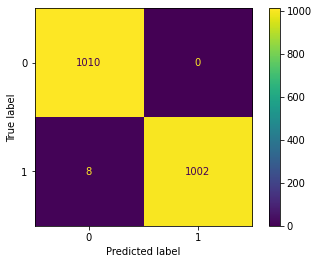

In [ ]:
sklearn.metrics.ConfusionMatrixDisplay.from_predictions(
...    y_test_single, y_pred_single)

In [ ]:
len(y_pred)

2020

In [ ]:
sklearn.metrics.f1_score(
...    y_test_single, y_pred_single)

0.9960238568588469

In [ ]:
history2.history

{'loss': [5173.142578125,
  1267.99658203125,
  164.43714904785156,
  70.84076690673828,
  17.11114501953125,
  20.438108444213867,
  6.428990840911865,
  5.873480796813965,
  4.054049968719482,
  5.7726545333862305,
  2.5117294788360596,
  3.322812080383301,
  2.3548073768615723,
  1.2331480979919434,
  1.0490620136260986,
  1.8710048198699951,
  0.8954160809516907,
  0.5810387134552002,
  1.2596322298049927,
  1.2866828441619873,
  0.979753315448761,
  1.5222113132476807],
 'accuracy': [0.6153438091278076,
  0.8242784142494202,
  0.948535680770874,
  0.9728353023529053,
  0.9857810139656067,
  0.985144317150116,
  0.992253839969635,
  0.9936332702636719,
  0.9939516186714172,
  0.9953310489654541,
  0.9968166351318359,
  0.9956493973731995,
  0.9972410798072815,
  0.997665524482727,
  0.997665524482727,
  0.9973471760749817,
  0.9977716207504272,
  0.9985144138336182,
  0.9983022212982178,
  0.9980899691581726,
  0.9985144138336182,
  0.9971349835395813],
 'val_loss': [4181.134277343